<a href="https://colab.research.google.com/github/DKLavanya/CODSOFT/blob/main/CodSoft_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv("/content/Titanic-Dataset.csv")

In [ ]:
data.drop(columns='Cabin', axis=1, inplace=True)
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Fare'].fillna(data['Fare'].mode()[0], inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [ ]:
data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [ ]:
sns.set()

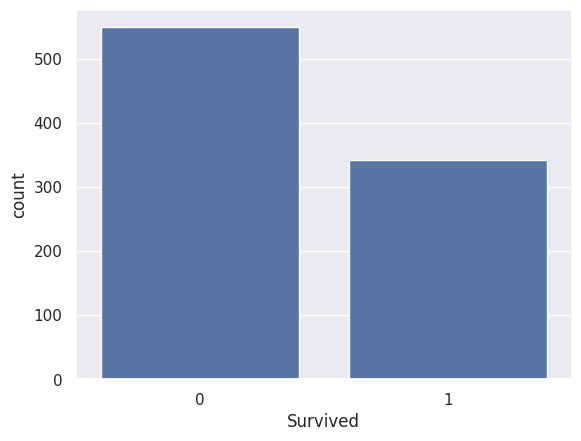

In [ ]:
sns.countplot(x='Survived', data=data)
plt.show()

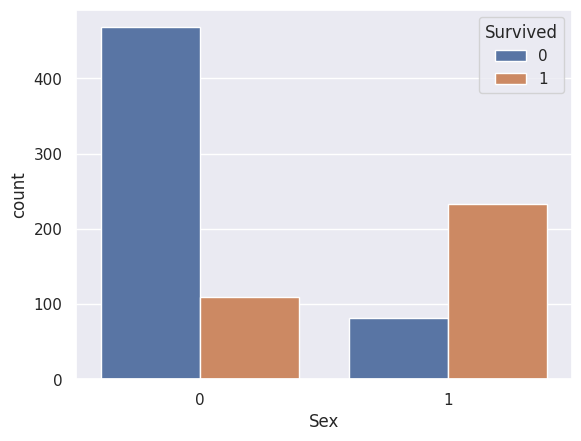

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=data)
plt.show()

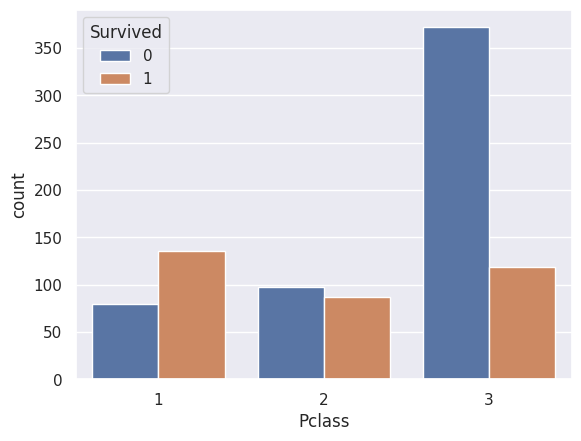

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.show()

In [ ]:
X = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
Y = data['Survived']

In [ ]:
print("Feature Matrix X:")
print(X.head())

Feature Matrix X:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  22.0      1      0   7.2500         0
1       1    1  38.0      1      0  71.2833         1
2       3    1  26.0      0      0   7.9250         0
3       1    1  35.0      1      0  53.1000         0
4       3    0  35.0      0      0   8.0500         0


In [ ]:
print("\nTarget Vector Y:")
print(Y.head())


Target Vector Y:
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80
